# Decision Trees
(by Tevfik Aytekin)


### Generate synthetic data

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn import linear_model


X, y = make_classification(n_samples = 50, n_features=2, n_redundant=0, n_informative=1, class_sep=1,
                             n_clusters_per_class=1)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='k');


### make_classification
[Python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

### Decision Tree Classification

/tmp/ipykernel_55337/1075941584.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X[idx, 0], X[idx, 1], c=color,


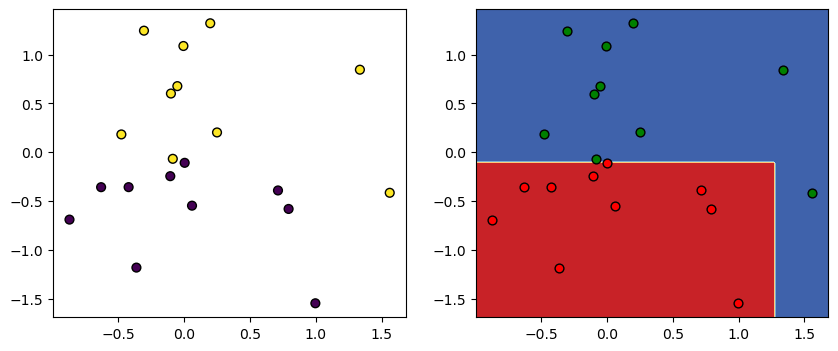

In [11]:
# Play with class_sep and observe the result
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Try different random states
X, y = make_classification(n_samples = 20, n_features=2, n_redundant=0, n_informative=1, class_sep=0.5,
                             n_clusters_per_class=1, random_state=5)

fig, ax = plt.subplots(1,2,figsize=(10,4));

ax[0].scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_step = 0.02
n_classes = 2
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
#plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    ax[1].scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

### Draw Decision Tree

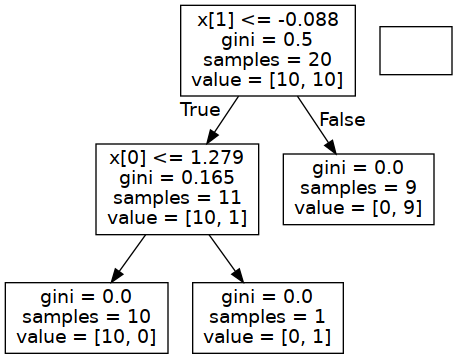

In [12]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

### Multiclass Classification

In [ ]:
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=1,
                             n_clusters_per_class=1, random_state=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Overfitting

In [ ]:
# Note that class_sep=0.2
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=0.2,
                             n_clusters_per_class=1, random_state=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### min_samples_split
The minimum number of samples required to split an internal node, we can use it to prevent splitting nodes with few instances. This often helps overfitting.

In [ ]:
# you can play with the min_samples_split parameter.
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier(min_samples_split=10)
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)



In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Bank Marketing Dataset

In [ ]:
# Bank Marketing Dataset from
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../../datasets/bank/bank-full.csv", delimiter = ";")

# print first 5 examples
bank.head(5)

In [ ]:
bank.y.value_counts()

In [ ]:
bank_majority = bank[bank.y=="no"]
bank_minority = bank[bank.y=="yes"]
 
# downsample
bank_majority_downsampled = resample(bank_majority, 
                                 replace=False,    
                                 n_samples=5289) 
 
bank_balanced = pd.concat([bank_minority, bank_majority_downsampled])
bank_balanced.y.value_counts()

In [ ]:
X

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = bank_balanced.loc[:,'age':'poutcome']
y = bank_balanced.loc[:,'y']
y = y.replace(["yes","no"],[1,0])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
 
clf = DecisionTreeClassifier(max_depth=5)
#clf = KNeighborsClassifier()
clf.fit(X_train, y_train);

y_pred1 = clf.predict(X_test)  

print(classification_report(y_test,y_pred1))


In [ ]:
plt.figure(figsize=(15,5))
plot_tree(clf, max_depth=2, fontsize=11, feature_names=list(X.columns));

### Decision Tree Regression

Decision trees can also be used for regression. Much of the algorithm is similar to building classification trees. The key difference is, the value which minimizes the following sum of squared error is chosen as the splitting point. In other words the split point is where the reduction in variance is maximum.

$$SSE=\sum_{i \in R_1}(y_i - \bar y_1)^2+\sum_{i \in R_2}(y_i - \bar y_2)^2$$

where $\bar y_1$ and $\bar y_2$ are the mean values in regions $R_1$ and $R_2$.

You can play with the following data to better understand how split points are chosen in order to reduce variance. Given the following dataset where should we put the splitting point to minimize variance?

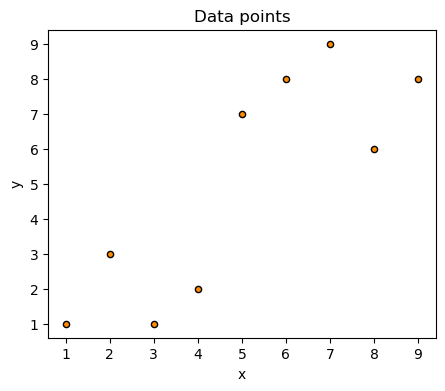

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X = np.array([1,2,3,4,5,6,7,8,9]);
X = X.reshape(-1,1)
y = [1,3,1,2,7,8,9,6,8]

# Plot the results
plt.figure(figsize=(5,4))

plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange");
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data points");


Below is the split point found by decision tree regression algorithmç

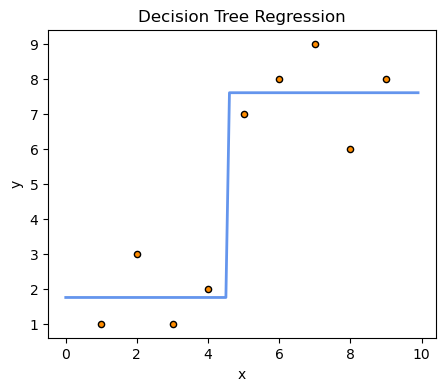

In [14]:
model = DecisionTreeRegressor(max_depth=1)
#play with max_depth
model.fit(X, y)

# Predict
X_test = np.arange(0, 10, 0.1)[:, np.newaxis]
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(5,4))

plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange")
plt.plot(X_test, y_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.show()

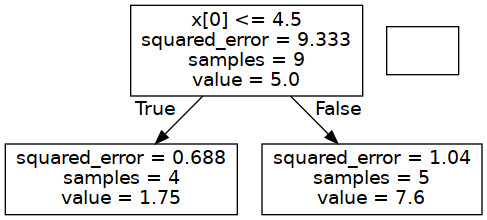

In [15]:
dot_data = tree.export_graphviz(model, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

(12, 1) (12,)
(2, 1) (2,)


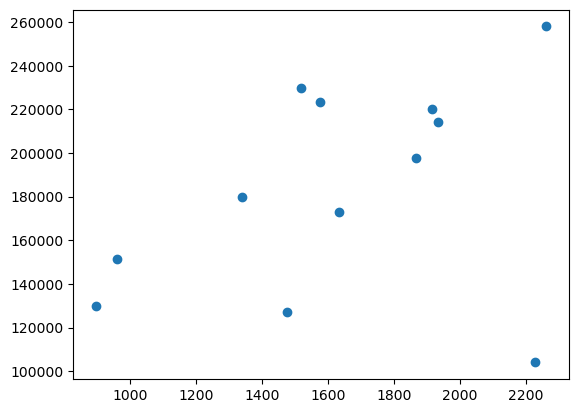

In [16]:

house = pd.read_csv("../../datasets/house_prices/train.csv")
train2 = house[(house.GrLivArea < 4000) & (house.SalePrice < 400000)]
train2 = train2.sample(frac=0.01)
X = train2[['GrLivArea']]
y = train2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

/home/tevfik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


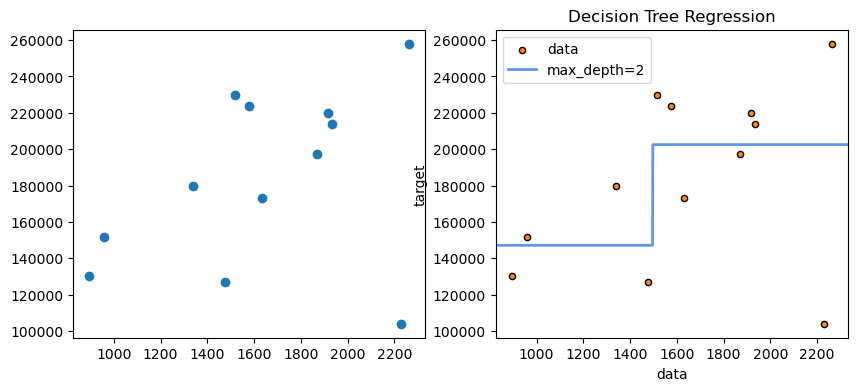

In [20]:

# Fit regression model
model = DecisionTreeRegressor(max_depth=1)
#increase max_depth to 4 to see overfitting

model.fit(X_train, y_train)

# Predict
X_test = np.arange(0.0, 3000.0, 1)[:, np.newaxis]
y_pred = model.predict(X_test)


fig, ax = plt.subplots(1,2,figsize=(10,4));

# Plot the results
ax[0].scatter(X_train, y_train)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
ax[1].scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
ax[1].plot(X_test, y_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()







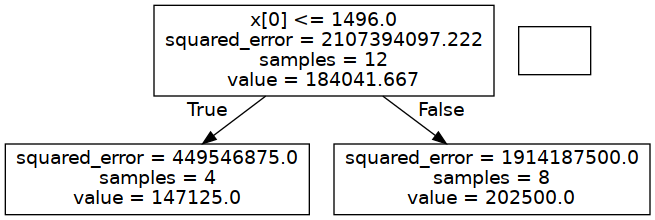

In [21]:
dot_data = tree.export_graphviz(model, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

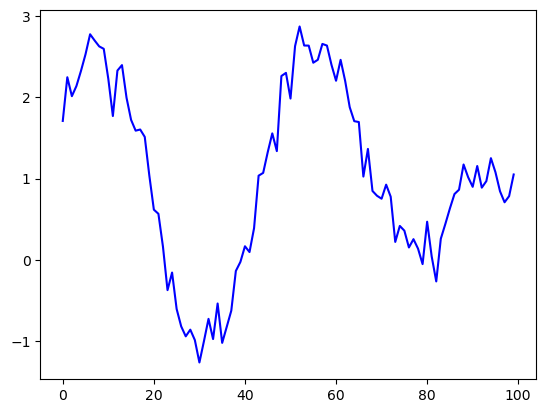

In [22]:
n = 100
X = np.linspace(0, 5, n)
y = 1 + np.sin(3*X) + np.cos(2*X) + np.random.normal(0, 0.2, n)
plt.plot(y, color="b")

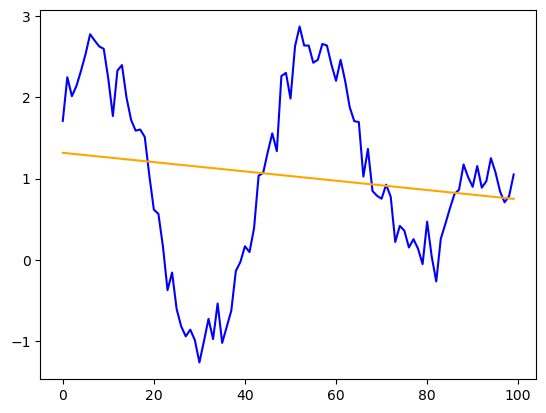

In [23]:
X = X.reshape(-1,1)
lm = linear_model.LinearRegression().fit(X,y)
preds = lm.predict(X)
plt.plot(y, color="blue")
plt.plot(preds, color="orange")

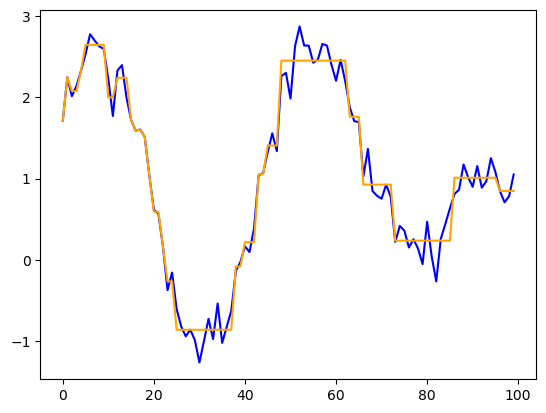

In [26]:
X = X.reshape(-1,1)
model = DecisionTreeRegressor(max_depth=5).fit(X,y)
#play with max_depth.fit(X,y)
preds = model.predict(X)
plt.plot(y, color="blue")
plt.plot(preds, color="orange")

In [27]:
# Run Regression with top correlated 10 attributes with SalePrice
from sklearn.metrics import mean_squared_log_error
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cors = house.corr(numeric_only=True); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = house.loc[:,top10]
y = house.loc[:,'SalePrice']
X = X.astype(float)

scaler = MinMaxScaler()

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # test set should be scaled with the scaler trained on the training set.
    X_test = scaler.transform(X_test)


    model = DecisionTreeRegressor()
    model = model.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))

print(top10)


Test MAE: 26828.240106544905
Test Kaggle-Score: 0.21498937490027356
Test MAPE: 15.517590920169235
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


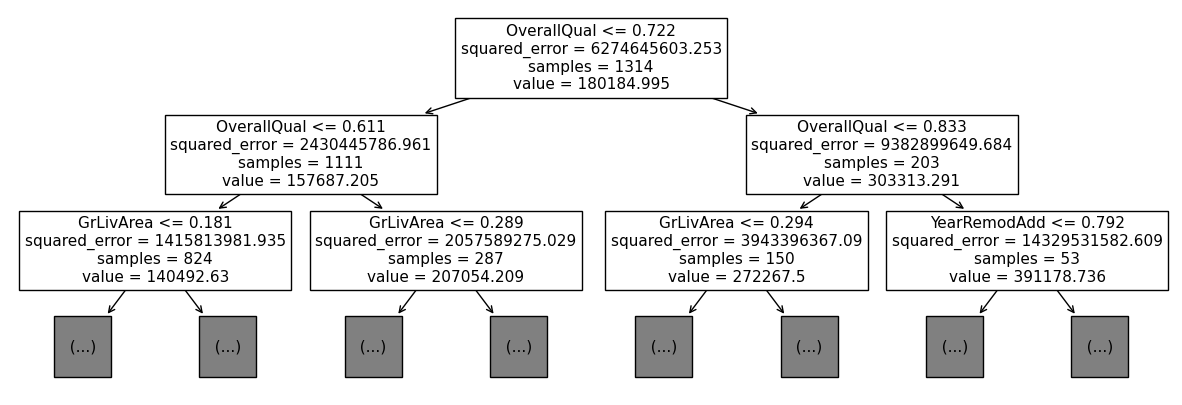

In [28]:
plt.figure(figsize=(15,5))
plot_tree(model, max_depth=2, fontsize=11, feature_names=list(X.columns));

In [29]:
# run Regression Tree with full data
X = house.loc[:,'MSSubClass':'SaleCondition']
y = house.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    model = DecisionTreeRegressor()
    model = model.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))




Test MAE: 25850.136986301368
Test Kaggle-Score: 0.21081260199929236
Test MAPE: 14.74283263588848


Note that different from knn, with full data decision tree algorithm gets a better result. This is due to the fact that, decision tree algorithm has a builtin feature selection mechanism which helps to prevent overfitting.

In [ ]:
plt.figure(figsize=(15,5))
plot_tree(model, max_depth=2, fontsize=11, feature_names=list(X.columns));